# **Heart Disease Predictor**

![uci_ml](Uci_ml.JPG)
![heart_pic](Heart_disease_pic.JPG)


## **Special thanks to UCI ML Repository and below creators of Heart Disease dataset:**

   1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

   2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

   3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

   4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### **Import the cleveland data file**

In [225]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook as tnb
tnb.pandas()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
cleveland_df = pd.read_csv('C:\\Users\\j302\\Downloads\\processed.cleveland.data',header=None)

In [3]:
cleveland_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### **Dataset dimensionality**

In [4]:
cleveland_df.shape

(303, 14)

#### **Assigning feature names to the dataset**

In [5]:
features = ['age','gender','chest_pain','rest_bp','cholestrol','fst_bs','rest_ecg','max_hrt_rate','ex_angina','oldpeak','slope','color_vsl','thal','num']

In [6]:
cleveland_df.columns = features

In [7]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **Data Pre-processing**

#### **Step-1: Class handling in 'num'**
Handling the multivariate predicted attribute i.e. 'num', in which records with values >1 are effected with CAD and <1 are non-CAD.

##### **Checking the counts before applying any operation**

In [8]:
pd.DataFrame(cleveland_df['num'].value_counts())

,num
0,164
1,55
2,36
3,35
4,13


##### **Finding the count of records with blockage > 50%**

In [9]:
cleveland_df[cleveland_df['num'] > 0]['num'].count()

139

##### **Categorizing the 'num' feature into two classes 0(Non-CAD i.e. blockage < 50%) and 1(CAD i.e. blockage >50%)**

In [10]:
cleveland_df['result'] = cleveland_df['num'].apply(lambda val : val if val == 0 else 1)

In [11]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [12]:
cleveland_df['result'].value_counts()

0    164
1    139
Name: result, dtype: int64

##### **Visualize the CAD and Non-CAD records**

In [13]:
bar_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

Text(0.5, 1.0, 'CAD and Non-CAD patient count')

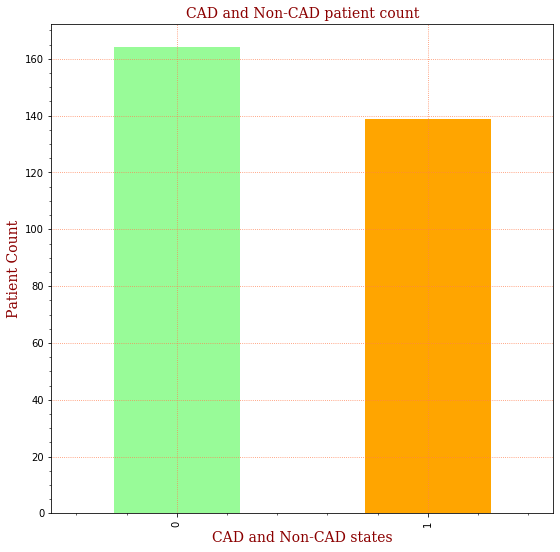

In [14]:
cleveland_df['result'].value_counts().plot(kind='bar', figsize=(9,9), color= ['palegreen','orange'])
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('CAD and Non-CAD states',fontdict=bar_font)
plt.ylabel('Patient Count',fontdict=bar_font)
plt.title('CAD and Non-CAD patient count',fontdict=bar_font)

##### **Finding the missing values**
As missing values are marked as '?'. So replacing such values with None.

In [15]:
cleveland_df = cleveland_df.applymap(lambda val : None if val == '?' else val)

In [16]:
cleveland_df

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


##### **Counting the missing values**

In [17]:
cleveland_df.isnull().sum()

age             0
gender          0
chest_pain      0
rest_bp         0
cholestrol      0
fst_bs          0
rest_ecg        0
max_hrt_rate    0
ex_angina       0
oldpeak         0
slope           0
color_vsl       4
thal            2
num             0
result          0
dtype: int64

##### **Visualize the missing records**

In [18]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

Text(0.5, 1, 'Missing values in the dataset')

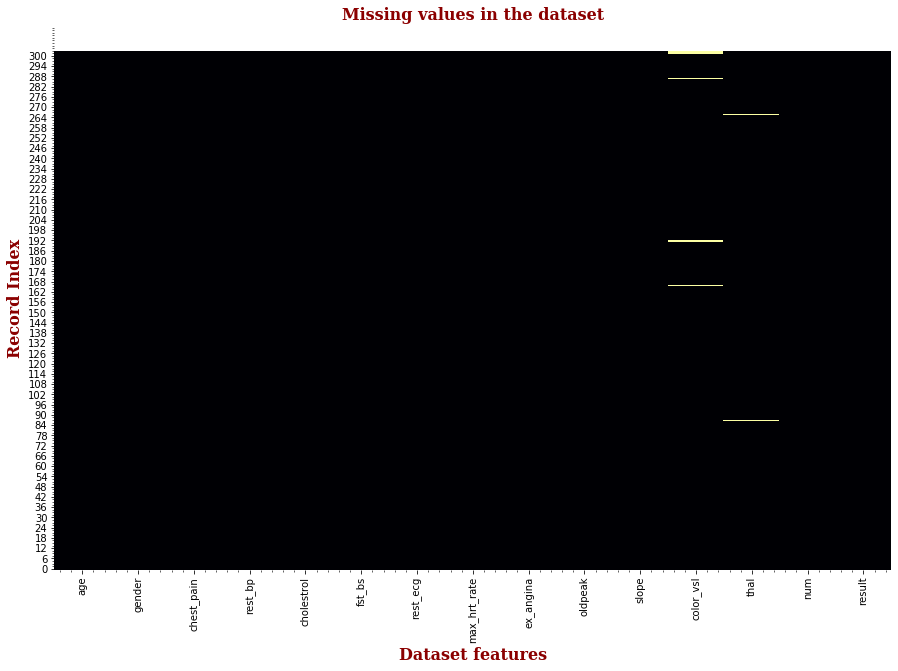

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(cleveland_df.isnull(),cbar=False,cmap='inferno')
plt.axis(ymin=0,ymax=318)
plt.minorticks_on()
plt.xlabel("Dataset features",fontdict=font)
plt.ylabel("Record Index",fontdict=font)
plt.title("Missing values in the dataset",fontdict=font)

In [20]:
# cleveland_df.dropna(axis=0,inplace=True)

In [21]:
# want_error

##### **Records with NULL Color_vsl or ca**

In [22]:
cleveland_df[cleveland_df['color_vsl'].isnull()]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,None,3.0,0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,None,7.0,1,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,None,7.0,0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,None,3.0,0,0


##### **Count the records for color_vsl categories**

In [23]:
cleveland_df['color_vsl'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: color_vsl, dtype: int64

##### **Count the CAD and Non-CAD records for every color_vsl category**

In [24]:
pd.DataFrame(cleveland_df.groupby(['color_vsl','result'])['result'].count())

result
color_vsl result        
0.0       0          130
          1           46
1.0       0           21
          1           44
2.0       0            7
          1           31
3.0       0            3
          1           17

### **Filling the missing values in COLOR_VSL feature**
##### **Replacing NULL with MAX occurence of respective feature class based on TARGET column** 

In [25]:
cleveland_df['fix_color_vsl'] = cleveland_df['color_vsl'].fillna(value='0.0')

In [26]:
cleveland_df['fix_color_vsl'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: fix_color_vsl, dtype: int64

##### **Records with NULL THAL or THALASSEMIA**

In [27]:
cleveland_df[cleveland_df['thal'].isnull()]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,None,0,0,0.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,None,2,1,0.0


##### **Count the records for thal categories**

In [28]:
cleveland_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

##### **Count the CAD and Non-CAD records for every thal category**

In [29]:
thal_missing_val = pd.DataFrame(cleveland_df.groupby(['thal','result'])['result'].count())

In [30]:
thal_missing_val.index.names = ['thal', 'result1']

In [31]:
thal_missing_val.sort_values(['thal'],ascending=True)

result
thal result1        
3.0  0           129
     1            37
6.0  0             6
     1            12
7.0  0            28
     1            89

### **Filling the missing values in THAL feature**
##### **Replacing NULL with MAX occurence of respective feature class based on TARGET column** 

In [32]:
cleveland_df[(cleveland_df['result'] == 0) & (cleveland_df['thal'].isna())]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,None,0,0,0.0


In [33]:
cleveland_df['result'].dtype

dtype('int64')

In [34]:
cleveland_df['fix_thal'] = cleveland_df[['thal','result']].apply(lambda val : '7.0' if val['result'] == 1 and val['thal'] == None else '3.0' if val['result'] == 0 and val['thal'] == None else val['thal'],axis=1)

In [35]:
cleveland_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [36]:
cleveland_df['fix_thal'].value_counts()

3.0    167
7.0    118
6.0     18
Name: fix_thal, dtype: int64

### **Visualizing missing values again**

In [37]:
cleveland_df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'color_vsl', 'thal', 'num', 'result', 'fix_color_vsl', 'fix_thal'],
      dtype='object')

In [38]:
missing_val_font = {'family':'serif',
                   'weight': 'bold',
                   'size': 14,
                   'color':'red'}

Text(0.5, 1, 'Post fix - Missing values')

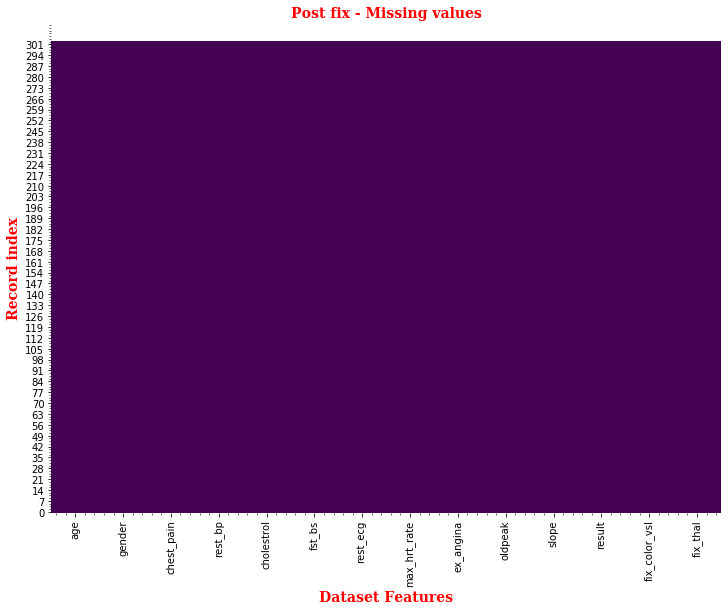

In [39]:
plt.figure(figsize=(12,9))
sns.heatmap(cleveland_df[['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope', 'result', 'fix_color_vsl', 'fix_thal']].isnull(),cbar=False,cmap='viridis')
plt.minorticks_on()
plt.axis(ymin=0,ymax=315)
plt.xlabel("Dataset Features",fontdict=missing_val_font)
plt.ylabel("Record index",fontdict=missing_val_font)
plt.title("Post fix - Missing values",fontdict=missing_val_font)

### **Datatype handling**

##### **Several columns are having definite values but are of float datatype**

In [40]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
age              303 non-null float64
gender           303 non-null float64
chest_pain       303 non-null float64
rest_bp          303 non-null float64
cholestrol       303 non-null float64
fst_bs           303 non-null float64
rest_ecg         303 non-null float64
max_hrt_rate     303 non-null float64
ex_angina        303 non-null float64
oldpeak          303 non-null float64
slope            303 non-null float64
color_vsl        299 non-null object
thal             301 non-null object
num              303 non-null int64
result           303 non-null int64
fix_color_vsl    303 non-null object
fix_thal         303 non-null object
dtypes: float64(11), int64(2), object(4)
memory usage: 35.6+ KB


In [41]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl,fix_thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.0,3.0


##### **Created a UDF for converting the datatypes of required columns**

In [42]:
def handle_datatype(df_name,unchange_col=None):
    """
    Description: This function will change the datatype of the features in the dataset.
    
    Input parameter:
    *df_name*: It will only accept the DataFrame object.
    *unchange_col*: This is the column for which you don't want to change the datatype.
    
    Return:
    It will returned the modified DataFrame object.
    """
    cols = ['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
            'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak','slope', 'result', 'fix_color_vsl', 'fix_thal']
    for col in cols:
        if col != unchange_col:
            df_name[col] = df_name[col].astype('float')
            df_name[col] = df_name[col].astype('int')
    return df_name

In [43]:
handle_datatype(cleveland_df,'oldpeak')

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1,1,3


### **Drop the non-required column**

In [44]:
cleveland_df.drop(['color_vsl','thal','num'],axis=1,inplace=True)

In [45]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,3


In [46]:
cleveland_df.shape

(303, 14)

In [47]:
cleveland_df.isnull().sum()

age              0
gender           0
chest_pain       0
rest_bp          0
cholestrol       0
fst_bs           0
rest_ecg         0
max_hrt_rate     0
ex_angina        0
oldpeak          0
slope            0
result           0
fix_color_vsl    0
fix_thal         0
dtype: int64

In [48]:
cleveland_df.dtypes

age                int32
gender             int32
chest_pain         int32
rest_bp            int32
cholestrol         int32
fst_bs             int32
rest_ecg           int32
max_hrt_rate       int32
ex_angina          int32
oldpeak          float64
slope              int32
result             int32
fix_color_vsl      int32
fix_thal           int32
dtype: object

## **Handling categorical variables**

In [49]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,3


#### **Function to perform get_dummies operation on Categorical -- Nomial/Ordinal variables**

In [50]:
def create_dummies(df_name,cols_list):
    """
    Description: This function will create a binary categorical columns from Nominal or Ordinal features.
    
    Input parameter: It will accept two parameter:
        1. df_name: The DataFrame object
        2. cols_list: The columns list which needs to be transformed
        
    Return:
    The updated DataFrame object.
    """
    for col in cols_list:
        df_name = pd.concat([pd.get_dummies(df_name[col],prefix=col),df_name],axis=1)
    return df_name

In [51]:
cleveland_df = create_dummies(cleveland_df,['gender','fst_bs','ex_angina'])

In [52]:
cleveland_df = create_dummies(cleveland_df,['chest_pain','rest_ecg','slope','fix_color_vsl','fix_thal'])

In [53]:
cleveland_df.shape

(303, 37)

In [54]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal'],
      dtype='object')

#### **Drop the unrequired columns**

In [55]:
# cleveland_df.drop(['fix_color_vsl','fix_thal','slope','rest_ecg','chest_pain'],axis=1,inplace=True)

In [56]:
cleveland_df.head()

,fix_thal_3,fix_thal_6,fix_thal_7,fix_color_vsl_0,fix_color_vsl_1,fix_color_vsl_2,fix_color_vsl_3,slope_1,slope_2,slope_3,...,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,0,1,0,1,0,0,0,0,0,1,...,233,1,2,150,0,2.3,3,0,0,6
1,1,0,0,0,0,0,1,0,1,0,...,286,0,2,108,1,1.5,2,1,3,3
2,0,0,1,0,0,1,0,0,1,0,...,229,0,2,129,1,2.6,2,1,2,7
3,1,0,0,1,0,0,0,0,0,1,...,250,0,0,187,0,3.5,3,0,0,3
4,1,0,0,1,0,0,0,1,0,0,...,204,0,2,172,0,1.4,1,0,0,3


In [57]:
cleveland_df.shape

(303, 37)

## **Handling Quantitative Variable**

## **Feature: REST_BP**

Text(0.5, 1.0, 'Distribution plot of Blood pressure in resting')

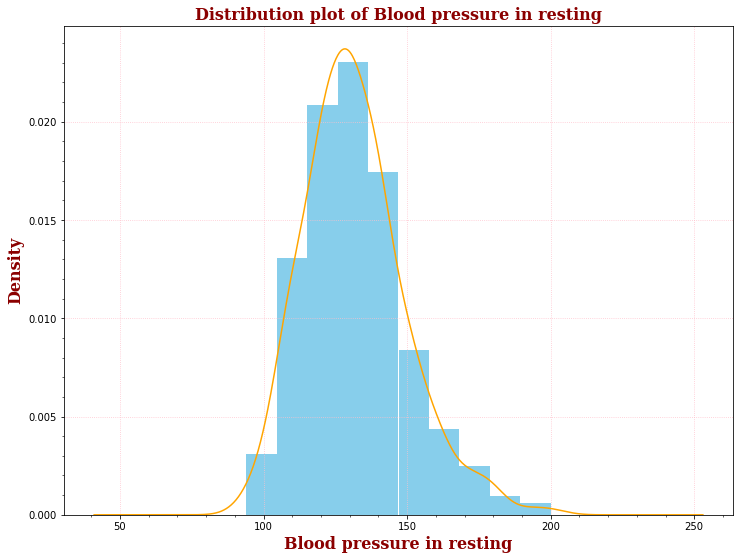

In [58]:
cleveland_df['rest_bp'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['rest_bp'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Blood pressure in resting',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Blood pressure in resting',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Rest BP')

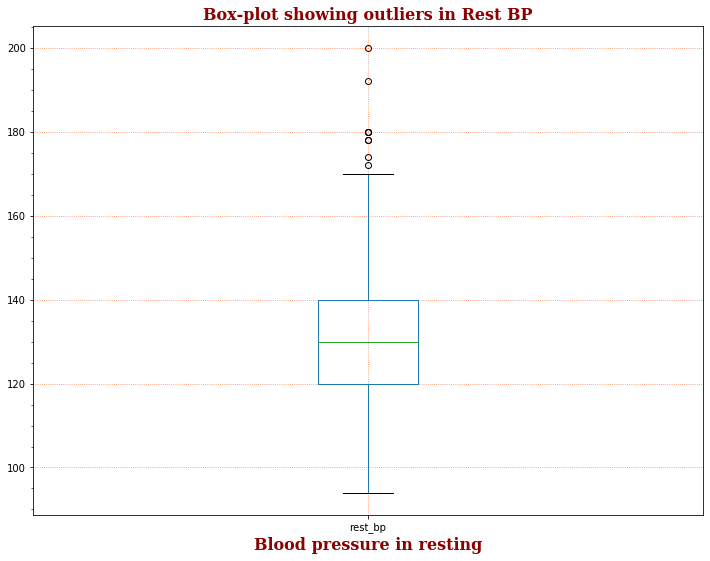

In [59]:
cleveland_df['rest_bp'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Blood pressure in resting',fontdict=font)
plt.title('Box-plot showing outliers in Rest BP',fontdict=font)

### **Scaling**

In [60]:
cleveland_df['scaled_rest_bp'] = (cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()

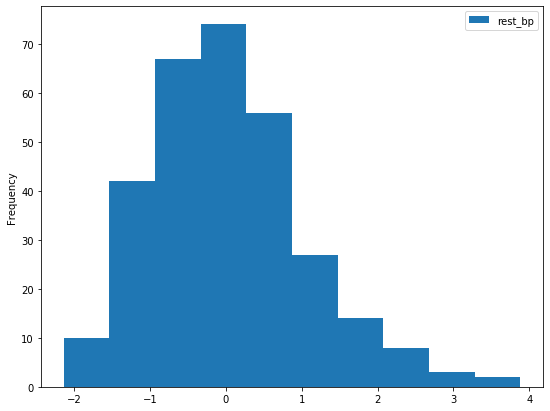

In [61]:
pd.DataFrame((cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()).plot(kind='hist',figsize=(9,7))

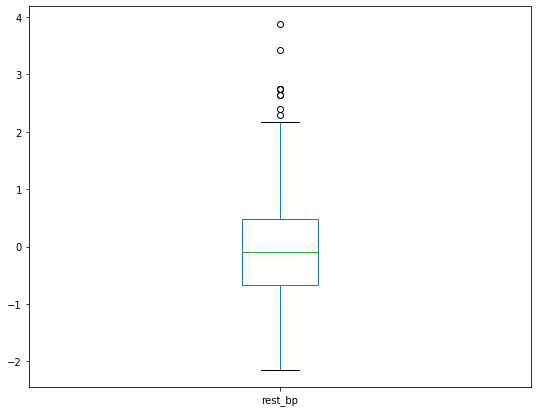

In [62]:
pd.DataFrame((cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()).plot(kind='box',figsize=(9,7))

## **Feature: CHOLESTROL**

Text(0.5, 1.0, 'Distribution plot of Serum Cholestrol')

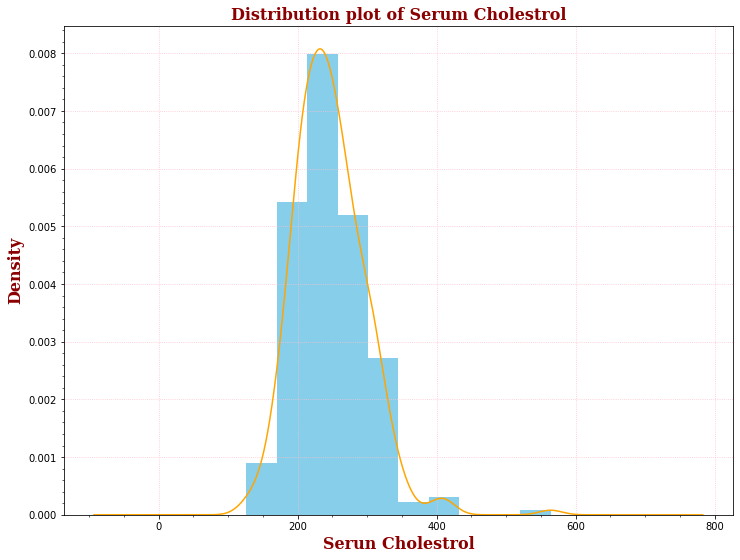

In [63]:
cleveland_df['cholestrol'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['cholestrol'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Serun Cholestrol',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Serum Cholestrol',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Cholestrol level')

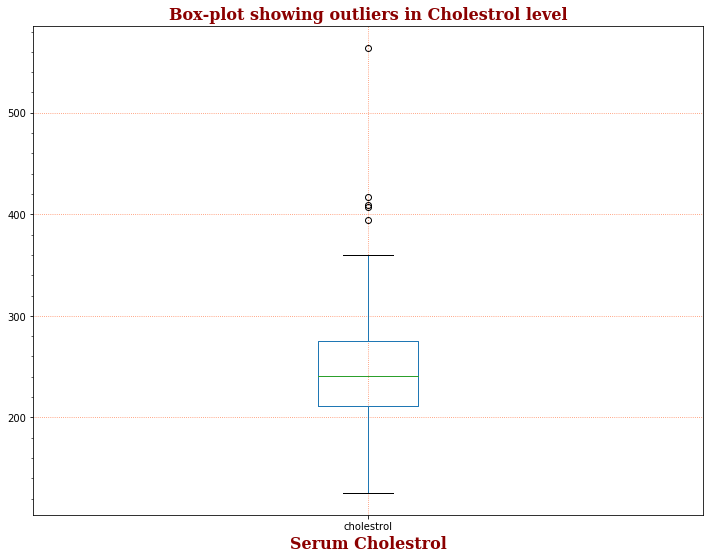

In [64]:
cleveland_df['cholestrol'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Serum Cholestrol',fontdict=font)
plt.title('Box-plot showing outliers in Cholestrol level',fontdict=font)

### **Scaling**

In [65]:
cleveland_df['scaled_cholestrol'] = (cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()

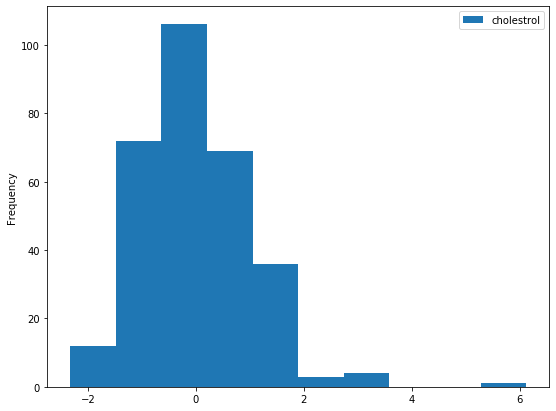

In [66]:
pd.DataFrame((cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()).plot(kind='hist',figsize=(9,7))

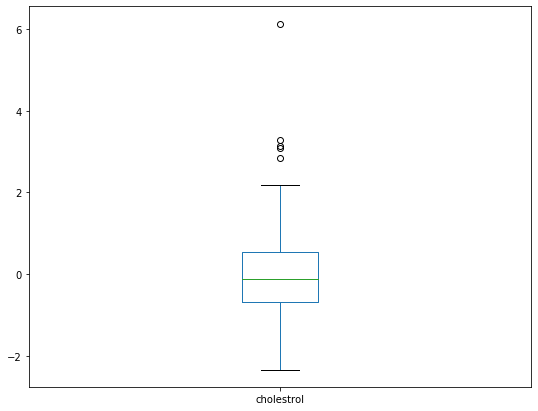

In [67]:
pd.DataFrame((cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()).plot(kind='box',figsize=(9,7))

## **Feature: MAX_HRT_RATE**

Text(0.5, 1.0, 'Distribution plot of Maximum heart-rate achieved')

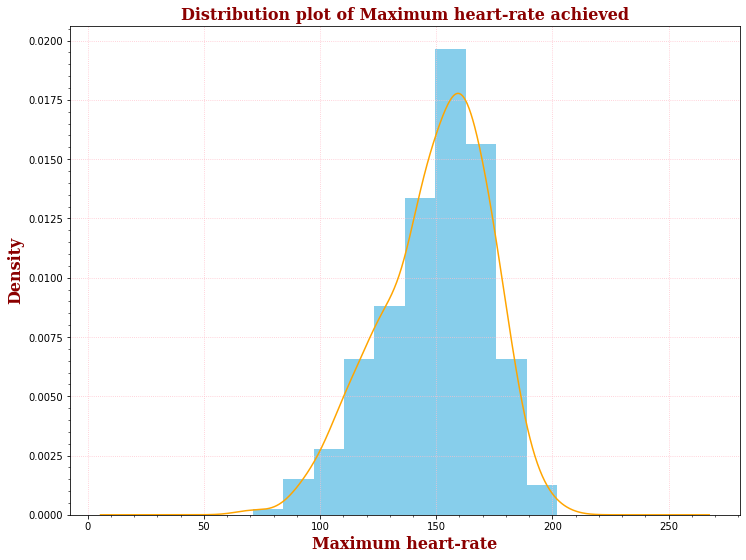

In [68]:
cleveland_df['max_hrt_rate'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['max_hrt_rate'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Maximum heart-rate',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Maximum heart-rate achieved',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Max Heart Rate')

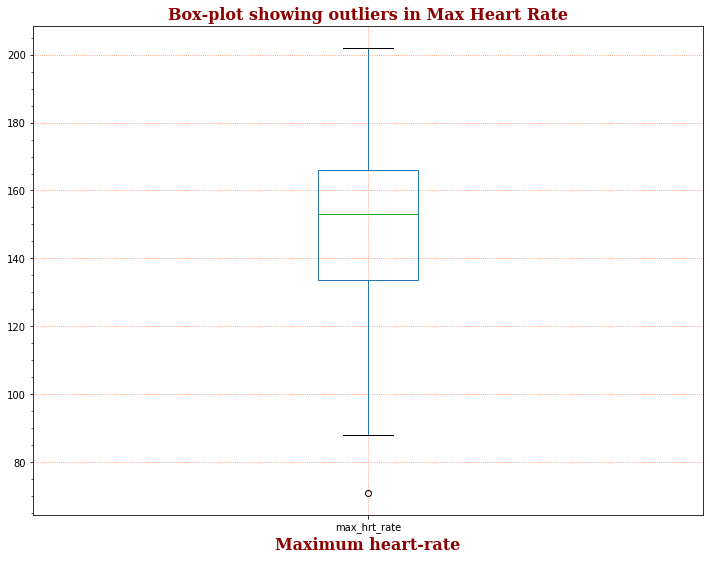

In [69]:
cleveland_df['max_hrt_rate'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Maximum heart-rate',fontdict=font)
plt.title('Box-plot showing outliers in Max Heart Rate',fontdict=font)

### **Scaling**

In [70]:
cleveland_df['scaled_max_hrt_rate'] = (cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()

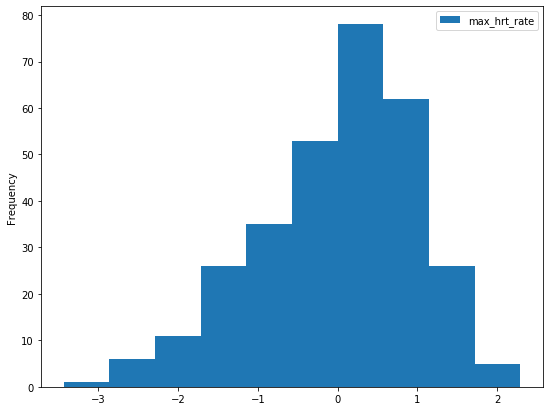

In [71]:
pd.DataFrame((cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()).plot(kind='hist',figsize=(9,7))

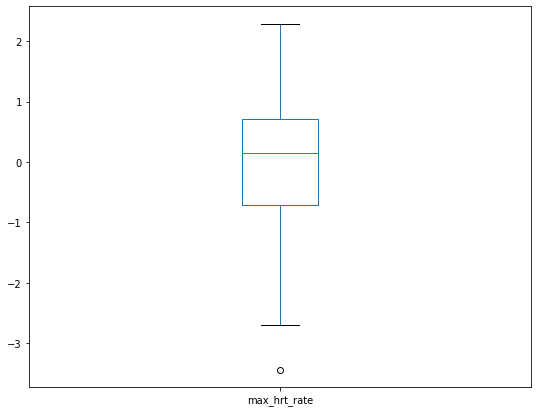

In [72]:
pd.DataFrame((cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()).plot(kind='box',figsize=(9,7))

## **Feature: OLDPEAK**

Text(0.5, 1.0, 'Distribution plot of ST depression induced by exercise relative to rest')

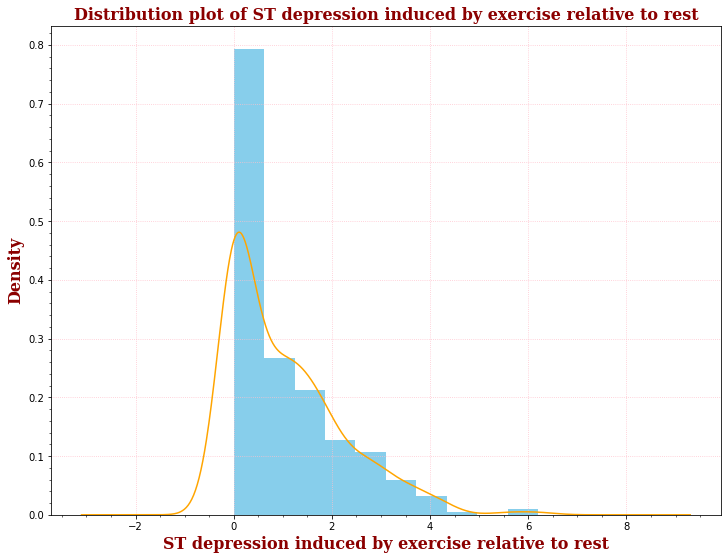

In [73]:
cleveland_df['oldpeak'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['oldpeak'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('ST depression induced by exercise relative to rest',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of ST depression induced by exercise relative to rest',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in OLDPEAK')

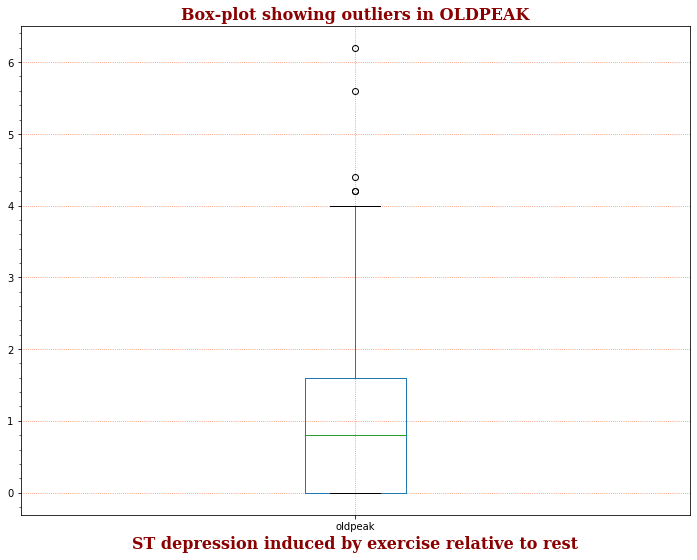

In [74]:
cleveland_df['oldpeak'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('ST depression induced by exercise relative to rest',fontdict=font)
plt.title('Box-plot showing outliers in OLDPEAK',fontdict=font)

### **Scaling**

In [75]:
cleveland_df['scaled_oldpeak'] = (cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()

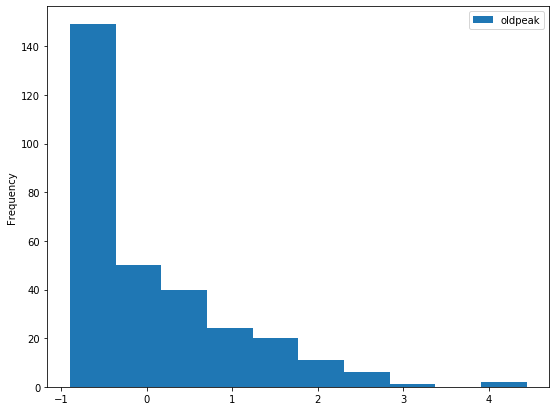

In [76]:
pd.DataFrame((cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()).plot(kind='hist',figsize=(9,7))

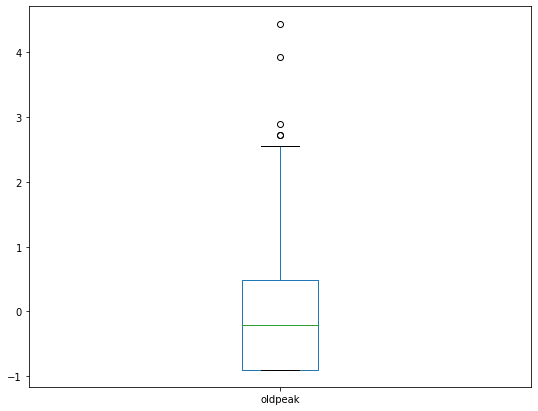

In [77]:
pd.DataFrame((cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()).plot(kind='box',figsize=(9,7))

## **Feature: AGE**

Text(0.5, 1.0, 'Distribution plot of Payment Age')

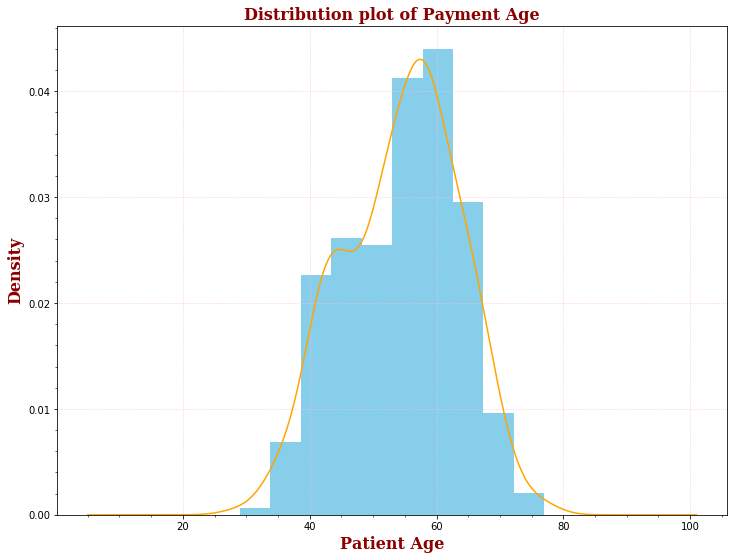

In [78]:
cleveland_df['age'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['age'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Patient Age',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Payment Age',fontdict=font)

### **BOX-PLOT: Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Patient Age')

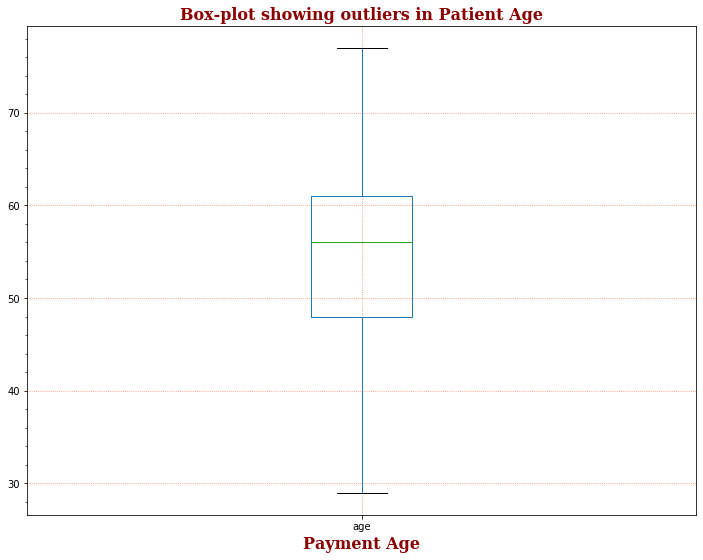

In [79]:
cleveland_df['age'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Payment Age',fontdict=font)
plt.title('Box-plot showing outliers in Patient Age',fontdict=font)

### **Scaling**

In [80]:
cleveland_df['scaled_age'] = (cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()

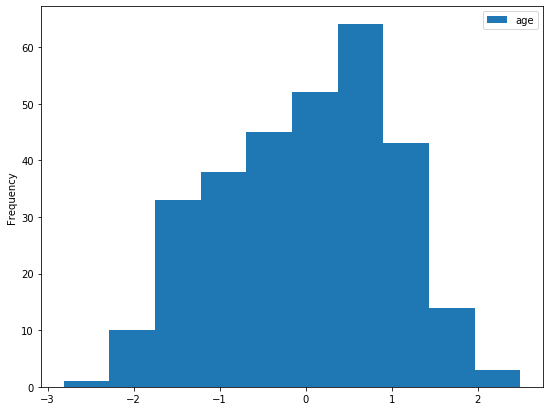

In [81]:
pd.DataFrame((cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()).plot(kind='hist',figsize=(9,7))

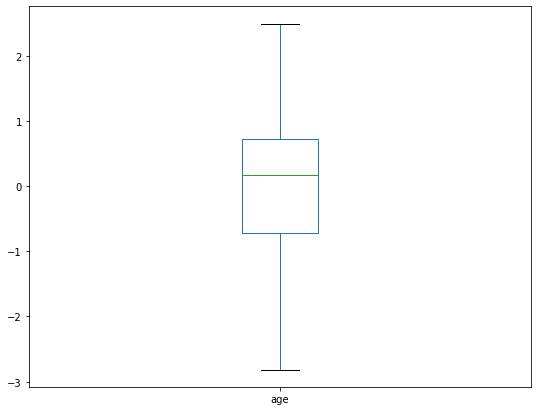

In [82]:
pd.DataFrame((cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()).plot(kind='box',figsize=(9,7))

In [83]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal', 'scaled_rest_bp',
       'scaled_cholestrol', 'scaled_max_hrt_rate', 'scaled_oldpeak',
       'scaled_age'],
      dtype='object')

In [84]:
from sklearn.preprocessing import QuantileTransformer

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

In [86]:
mms = MinMaxScaler()

In [87]:
rs = RobustScaler()

In [88]:
qt = QuantileTransformer(n_quantiles=303)

In [89]:
import numpy as np

In [90]:
cleveland_df['trans_rest_bp'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(mms.fit_transform(cleveland_df[['rest_bp']]))))))

In [91]:
cleveland_df['trans_cholestrol'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(mms.fit_transform(cleveland_df[['cholestrol']]))))))

In [92]:
cleveland_df['trans_max_hrt_rate'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(mms.fit_transform(cleveland_df[['max_hrt_rate']]))))))

In [93]:
cleveland_df['trans_oldpeak'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(mms.fit_transform(cleveland_df[['oldpeak']]))))))

In [94]:
cleveland_df['trans_age'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(mms.fit_transform(cleveland_df[['age']]))))))

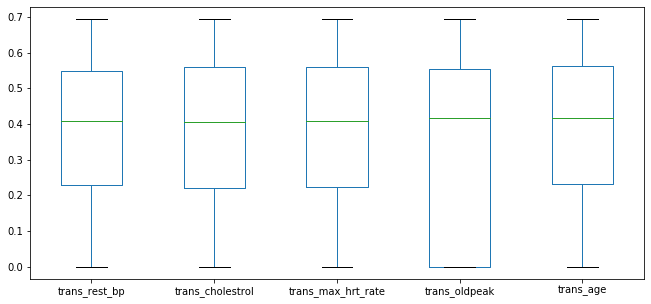

In [95]:
cleveland_df[['trans_rest_bp','trans_cholestrol','trans_max_hrt_rate','trans_oldpeak','trans_age']].plot(kind='box',figsize=(11,5))

In [96]:
cleveland_df[['trans_rest_bp','trans_cholestrol','trans_max_hrt_rate','trans_oldpeak','trans_age']]

,trans_rest_bp,trans_cholestrol,trans_max_hrt_rate,trans_oldpeak,trans_age
0,0.591276,0.354520,0.369506,0.618402,0.597671
1,0.659474,0.587603,0.045315,0.538583,0.657760
2,0.229744,0.327444,0.175677,0.634332,0.657760
3,0.408771,0.454991,0.683164,0.671389,0.026145
4,0.408771,0.178451,0.607640,0.520054,0.071859
...,...,...,...,...,...
298,0.091691,0.513141,0.208467,0.488052,0.178451
299,0.585761,0.105195,0.265924,0.667999,0.668848
300,0.408771,0.003306,0.088666,0.488052,0.446552
301,0.408771,0.380883,0.631694,0.000000,0.446552


In [97]:
def apply_transformation(df_name,col_list):
    """
    Description: This 
    
    Input parameter:
    
    Return: 
    """
    qt = QuantileTransformer(n_quantiles=303,output_distribution='uniform')
    for col in col_list:
        trans_df = pd.DataFrame(qt.fit_transform(df_name[[col]]))
        trans_df.columns=[str('trans')+str(col)[6:]]
        df_name = pd.concat([df_name,trans_df],axis=1)
    return df_name

In [98]:
# cleveland_df = apply_transformation(cleveland_df,['scaled_rest_bp', 'scaled_cholestrol','scaled_max_hrt_rate', 'scaled_oldpeak', 'scaled_age'])

In [99]:
cleveland_df.head()

,fix_thal_3,fix_thal_6,fix_thal_7,fix_color_vsl_0,fix_color_vsl_1,fix_color_vsl_2,fix_color_vsl_3,slope_1,slope_2,slope_3,...,scaled_rest_bp,scaled_cholestrol,scaled_max_hrt_rate,scaled_oldpeak,scaled_age,trans_rest_bp,trans_cholestrol,trans_max_hrt_rate,trans_oldpeak,trans_age
0,0,1,0,1,0,0,0,0,0,1,...,0.756274,-0.264463,0.017169,1.085542,0.947160,0.591276,0.354520,0.369506,0.618402,0.597671
1,1,0,0,0,0,0,1,0,1,0,...,1.608559,0.759159,-1.818896,0.396526,1.389703,0.659474,0.587603,0.045315,0.538583,0.657760
2,0,0,1,0,0,1,0,0,1,0,...,-0.664201,-0.341717,-0.900864,1.343924,1.389703,0.229744,0.327444,0.175677,0.634332,0.657760
3,1,0,0,1,0,0,0,0,0,1,...,-0.096011,0.063869,1.634655,2.119067,-1.929372,0.408771,0.454991,0.683164,0.671389,0.026145
4,1,0,0,1,0,0,0,1,0,0,...,-0.096011,-0.824558,0.978917,0.310399,-1.486829,0.408771,0.178451,0.607640,0.520054,0.071859


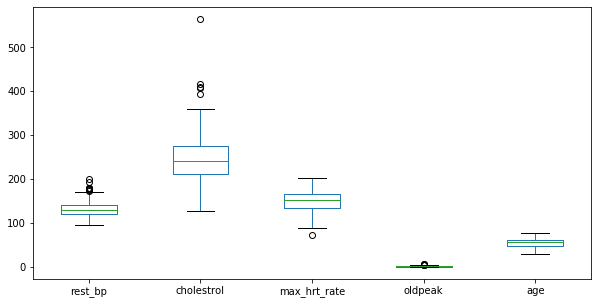

In [100]:
cleveland_df[['rest_bp', 'cholestrol','max_hrt_rate', 'oldpeak', 'age']].plot(kind='box',figsize=(10,5))

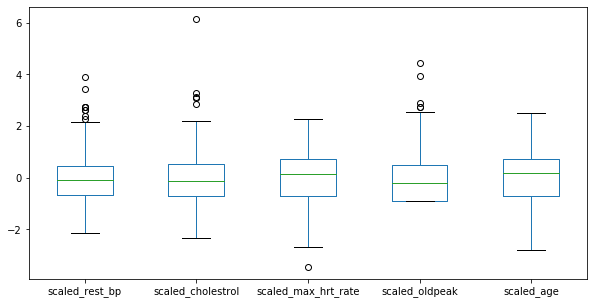

In [101]:
cleveland_df[['scaled_rest_bp', 'scaled_cholestrol','scaled_max_hrt_rate', 'scaled_oldpeak', 'scaled_age']].plot(kind='box',figsize=(10,5))

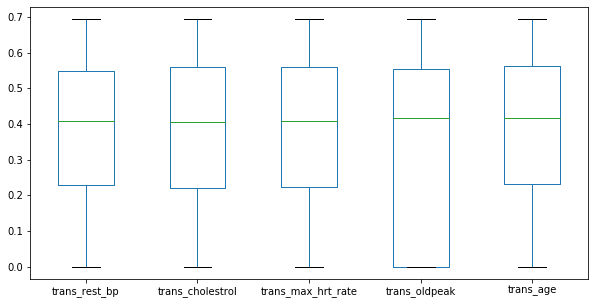

In [102]:
cleveland_df[['trans_rest_bp','trans_cholestrol','trans_max_hrt_rate','trans_oldpeak','trans_age']].plot(kind='box',figsize=(10,5))

In [103]:
cleveland_df.head()

,fix_thal_3,fix_thal_6,fix_thal_7,fix_color_vsl_0,fix_color_vsl_1,fix_color_vsl_2,fix_color_vsl_3,slope_1,slope_2,slope_3,...,scaled_rest_bp,scaled_cholestrol,scaled_max_hrt_rate,scaled_oldpeak,scaled_age,trans_rest_bp,trans_cholestrol,trans_max_hrt_rate,trans_oldpeak,trans_age
0,0,1,0,1,0,0,0,0,0,1,...,0.756274,-0.264463,0.017169,1.085542,0.947160,0.591276,0.354520,0.369506,0.618402,0.597671
1,1,0,0,0,0,0,1,0,1,0,...,1.608559,0.759159,-1.818896,0.396526,1.389703,0.659474,0.587603,0.045315,0.538583,0.657760
2,0,0,1,0,0,1,0,0,1,0,...,-0.664201,-0.341717,-0.900864,1.343924,1.389703,0.229744,0.327444,0.175677,0.634332,0.657760
3,1,0,0,1,0,0,0,0,0,1,...,-0.096011,0.063869,1.634655,2.119067,-1.929372,0.408771,0.454991,0.683164,0.671389,0.026145
4,1,0,0,1,0,0,0,1,0,0,...,-0.096011,-0.824558,0.978917,0.310399,-1.486829,0.408771,0.178451,0.607640,0.520054,0.071859


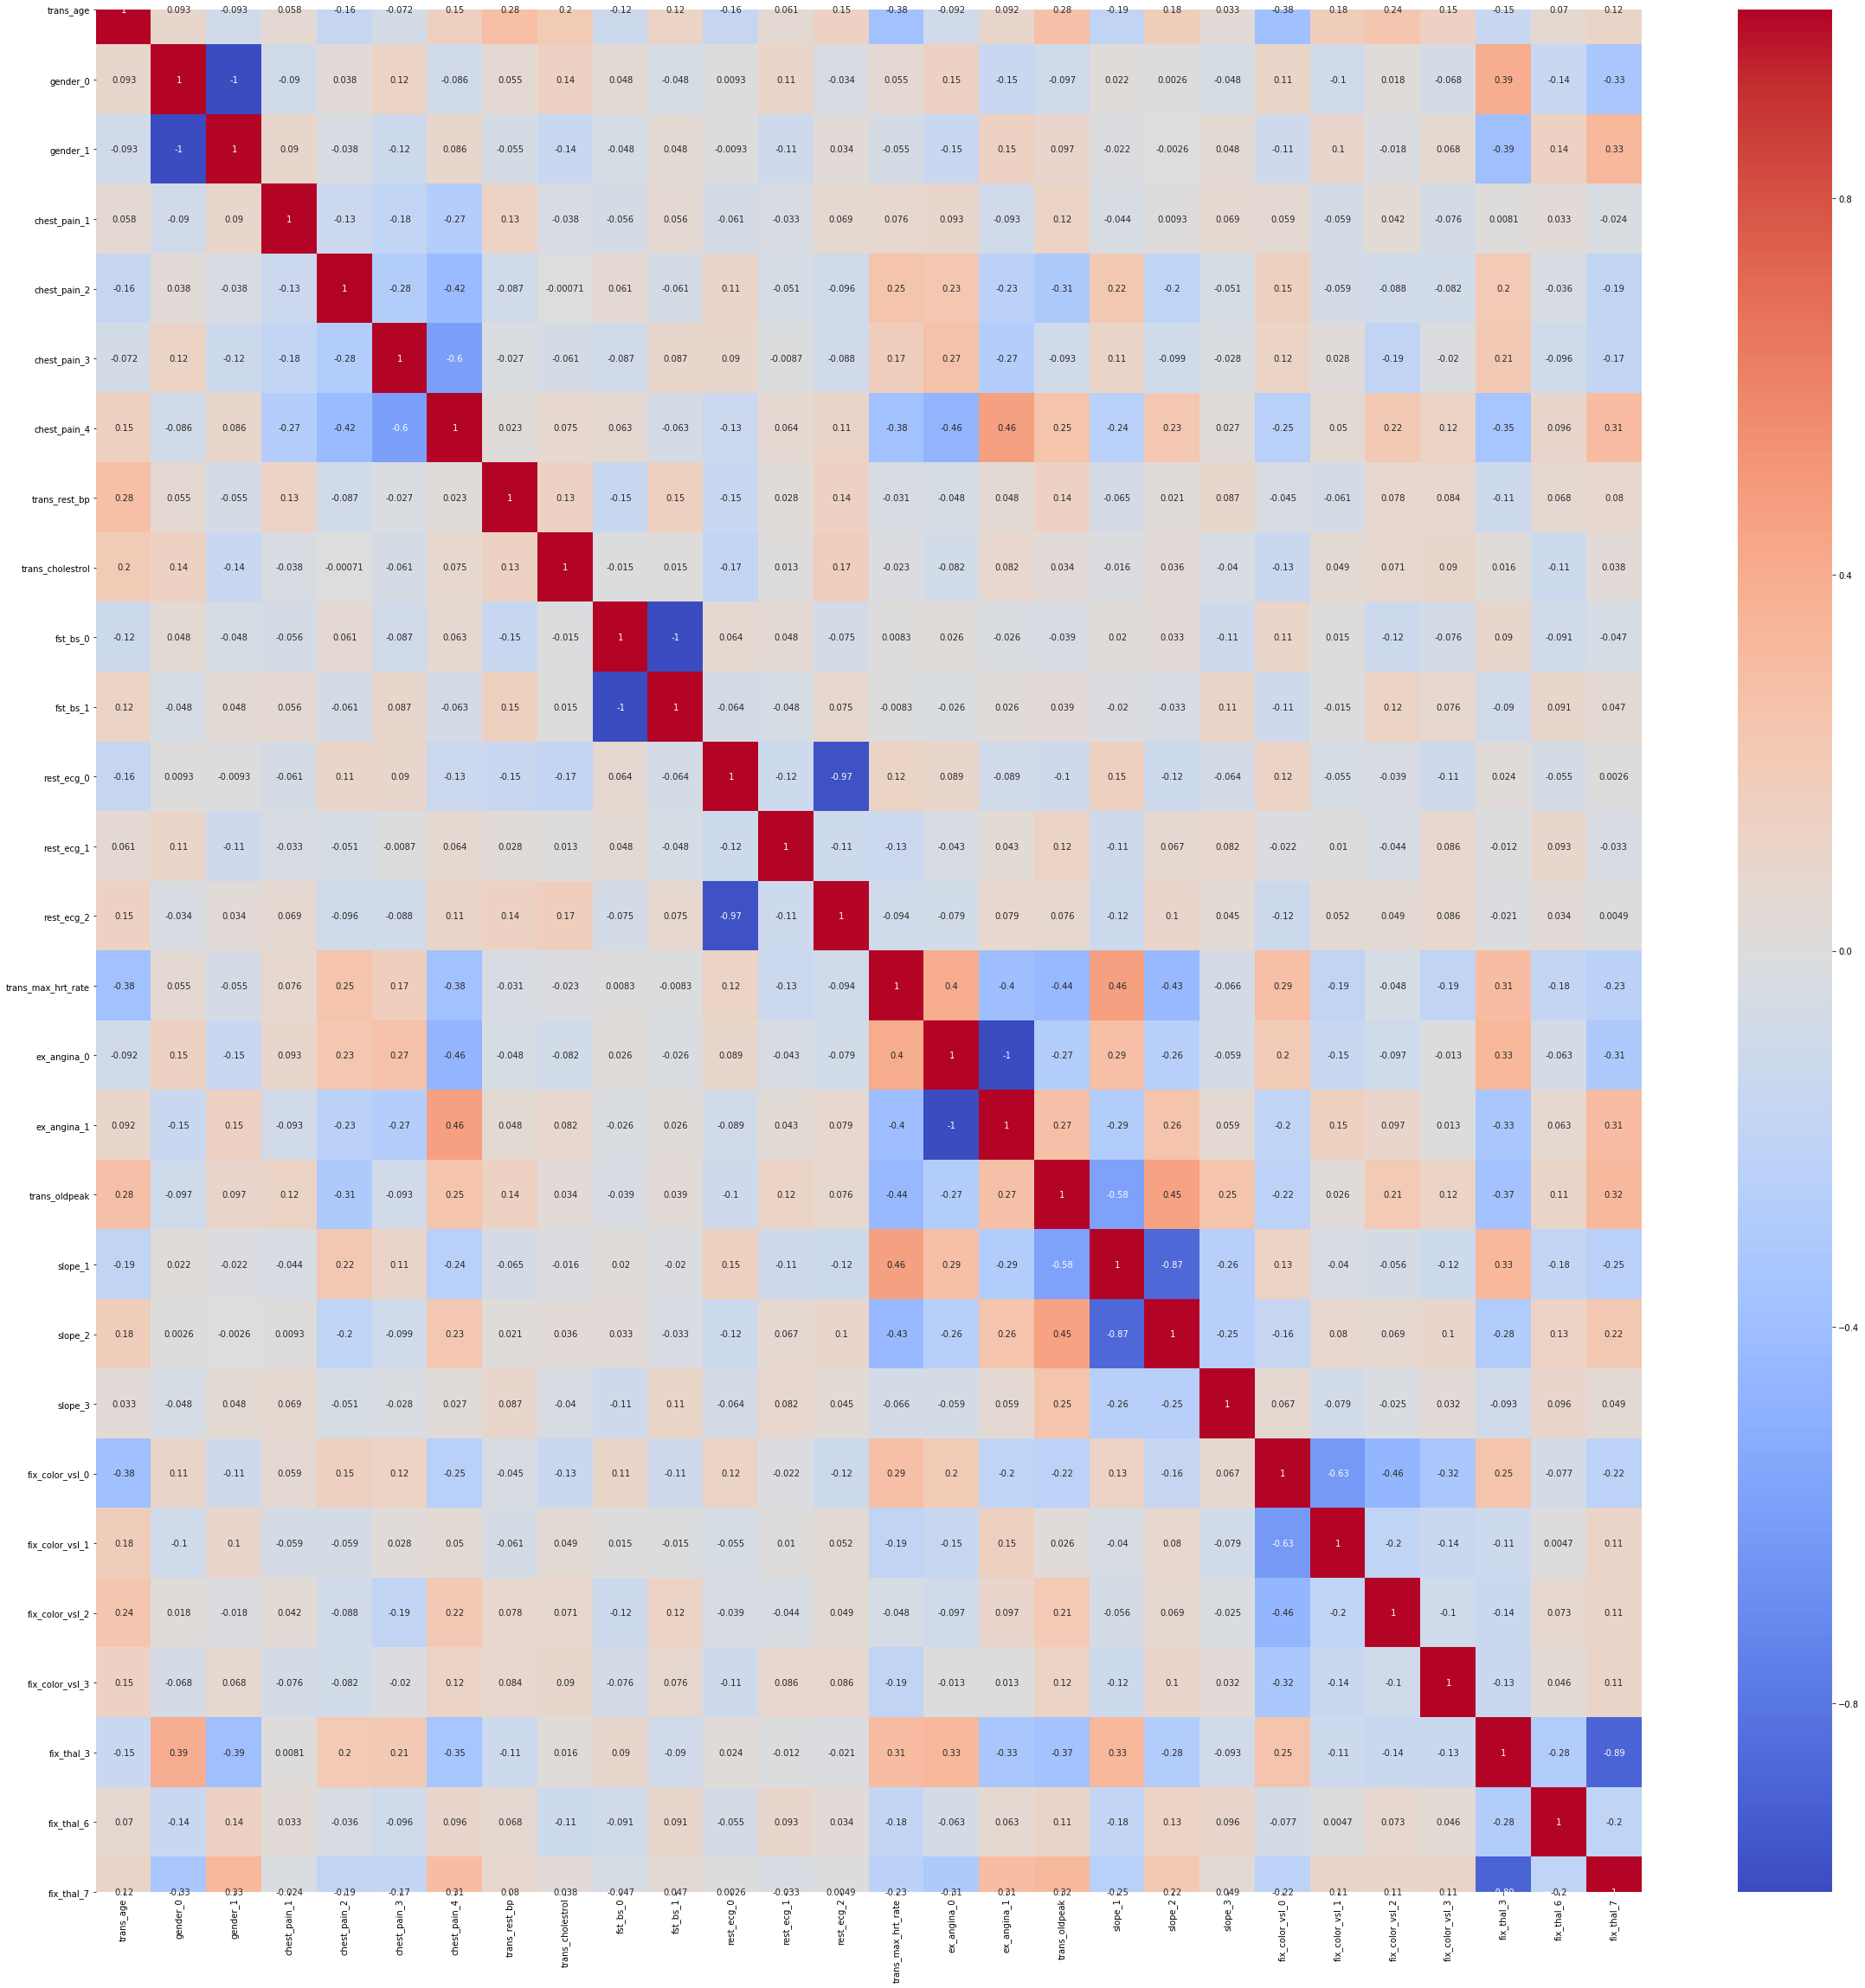

In [104]:
plt.figure(figsize=(40,40))
sns.heatmap(cleveland_df[['trans_age','gender_0','gender_1','chest_pain_1','chest_pain_2','chest_pain_3','chest_pain_4','trans_rest_bp','trans_cholestrol',
                                    'fst_bs_0','fst_bs_1','rest_ecg_0','rest_ecg_1','rest_ecg_2','trans_max_hrt_rate','ex_angina_0','ex_angina_1','trans_oldpeak','slope_1','slope_2',
                                    'slope_3','fix_color_vsl_0','fix_color_vsl_1','fix_color_vsl_2','fix_color_vsl_3','fix_thal_3','fix_thal_6','fix_thal_7'
                                    ]].corr(), cmap='coolwarm',annot=True)

In [105]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal', 'scaled_rest_bp',
       'scaled_cholestrol', 'scaled_max_hrt_rate', 'scaled_oldpeak',
       'scaled_age', 'trans_rest_bp', 'trans_cholestrol', 'trans_max_hrt_rate',
       'trans_oldpeak', 'trans_age'],
      dtype='object')

X_cleveland_df = cleveland_df[['trans_age','gender','chest_pain_1','chest_pain_2','chest_pain_3','chest_pain_4','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg_0','rest_ecg_1','rest_ecg_2','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope_1','slope_2','slope_3','fix_color_vsl_0','fix_color_vsl_1','fix_color_vsl_2','fix_color_vsl_3',
                               'fix_thal_3','fix_thal_6','fix_thal_7']]#.iloc[0:250,]

In [106]:
X_cleveland_df = cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']]#.iloc[0:250,]

In [107]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal', 'scaled_rest_bp',
       'scaled_cholestrol', 'scaled_max_hrt_rate', 'scaled_oldpeak',
       'scaled_age', 'trans_rest_bp', 'trans_cholestrol', 'trans_max_hrt_rate',
       'trans_oldpeak', 'trans_age'],
      dtype='object')

In [108]:
X_cleveland_df

,trans_age,gender,chest_pain,trans_rest_bp,trans_cholestrol,fst_bs,rest_ecg,trans_max_hrt_rate,ex_angina,trans_oldpeak,slope,fix_color_vsl,fix_thal
0,0.597671,1,1,0.591276,0.354520,1,2,0.369506,0,0.618402,3,0,6
1,0.657760,1,4,0.659474,0.587603,0,2,0.045315,1,0.538583,2,3,3
2,0.657760,1,4,0.229744,0.327444,0,2,0.175677,1,0.634332,2,2,7
3,0.026145,1,3,0.408771,0.454991,0,0,0.683164,0,0.671389,3,0,3
4,0.071859,0,2,0.408771,0.178451,0,2,0.607640,0,0.520054,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.178451,1,1,0.091691,0.513141,0,0,0.208467,0,0.488052,2,0,7
299,0.668848,1,4,0.585761,0.105195,1,0,0.265924,0,0.667999,2,2,7
300,0.446552,1,4,0.408771,0.003306,0,0,0.088666,1,0.488052,2,1,7
301,0.446552,0,2,0.408771,0.380883,0,2,0.631694,0,0.000000,2,1,3


In [109]:
Y_cleveland_df = cleveland_df['result']#.iloc[0:250,]

In [110]:
Y_cleveland_df

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: result, Length: 303, dtype: int32

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc_scr
from sklearn.metrics import precision_score as prec_scr
from sklearn.metrics import recall_score as rec_scr
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB

In [112]:
from imblearn.over_sampling import RandomOverSampler

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is

In [113]:
over_samp=RandomOverSampler(ratio=1)

In [114]:
X_train_res,y_train_res = over_samp.fit_sample(X_cleveland_df,Y_cleveland_df)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [115]:
X_train_split, X_test_split, y_train_split, y_test_split = tts(X_train_res,y_train_res,test_size=0.1)

In [116]:
X_train_res.shape,X_train_split.shape,X_test_split.shape

((328, 13), (295, 13), (33, 13))

## **Gradient Boosting Classifier**

In [117]:
model_gbc = GradientBoostingClassifier()

In [118]:
model_gbc.fit(X_train_split,y_train_split)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [119]:
y_predict_gbc = model_gbc.predict(X_test_split)

In [120]:
acc_scr(y_test_split,y_predict_gbc)

0.7878787878787878

In [121]:
prec_scr(y_test_split,y_predict_gbc)

0.8666666666666667

In [122]:
rec_scr(y_test_split,y_predict_gbc)

0.7222222222222222

In [123]:
roc_auc_score(y_test_split,y_predict_gbc)

0.7944444444444445

## **Naive Bayes**

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [125]:
model_nb = GaussianNB()

In [126]:
model_nb.fit(X_train_split,y_train_split)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
y_predict_nb = model_nb.predict(X_test_split)

In [128]:
acc_scr(y_test_split,y_predict_nb)

0.7878787878787878

In [129]:
prec_scr(y_test_split,y_predict_nb)

0.8666666666666667

In [130]:
rec_scr(y_test_split,y_predict_nb)

0.7222222222222222

In [131]:
roc_auc_score(y_test_split,y_predict_nb)

0.7944444444444445

## **Cross-validation score**

### **GBC**

In [132]:
cross_val_score(GradientBoostingClassifier(),X_train_res,y_train_res,cv=10)

array([0.90909091, 0.78787879, 0.90909091, 0.87878788, 0.84848485,
       0.66666667, 0.66666667, 0.81818182, 0.8125    , 0.9375    ])

In [133]:
cross_val_score(GradientBoostingClassifier(),X_train_res,y_train_res,cv=10).mean()*100

82.34848484848484

### **GNB**

In [134]:
cross_val_score(GaussianNB(),X_train_res,y_train_res,cv=10)

array([0.84848485, 0.72727273, 0.87878788, 0.87878788, 0.84848485,
       0.6969697 , 0.87878788, 0.81818182, 0.8125    , 0.9375    ])

In [135]:
cross_val_score(GaussianNB(),X_train_res,y_train_res,cv=10).mean()*100

83.25757575757574

## **Logistic Regression**

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
model_lr = LogisticRegression()

In [138]:
model_lr.fit(X_train_split,y_train_split)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_predict_lr = model_lr.predict(X_test_split)

In [140]:
acc_scr(y_test_split,y_predict_lr)

0.8484848484848485

In [141]:
prec_scr(y_test_split,y_predict_lr)

0.9333333333333333

In [142]:
rec_scr(y_test_split,y_predict_lr)

0.7777777777777778

In [143]:
roc_auc_score(y_test_split,y_predict_lr)

0.8555555555555555

### **LR -- Cross Validation**

In [144]:
cross_val_score(LogisticRegression(),X_train_res,y_train_res,cv=10)

array([0.87878788, 0.78787879, 0.90909091, 0.90909091, 0.84848485,
       0.6969697 , 0.81818182, 0.84848485, 0.8125    , 0.90625   ])

In [145]:
cross_val_score(LogisticRegression(),X_train_res,y_train_res,cv=10).mean()*100

84.15719696969695

## **Decision-Tree**

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

In [147]:
model_dt = DecisionTreeClassifier()

In [148]:
model_dt.fit(X_train_split,y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [149]:
y_predict_dt = model_dt.predict(X_test_split)

In [150]:
acc_scr(y_test_split,y_predict_dt)

0.7272727272727273

In [151]:
prec_scr(y_test_split,y_predict_dt)

0.7142857142857143

In [152]:
rec_scr(y_test_split,y_predict_dt)

0.8333333333333334

### **DT -- Cross Validation**

In [153]:
cross_val_score(DecisionTreeClassifier(),X_train_res,y_train_res,cv=10)

array([0.84848485, 0.75757576, 0.96969697, 0.78787879, 0.78787879,
       0.66666667, 0.57575758, 0.78787879, 0.8125    , 0.84375   ])

In [154]:
cross_val_score(DecisionTreeClassifier(),X_train_res,y_train_res,cv=10).mean()*100

76.5719696969697

## **Random Forest**

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [156]:
model_rf = RandomForestClassifier()

In [157]:
model_rf.fit(X_train_split,y_train_split)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
y_predict_rf = model_rf.predict(X_test_split)

In [159]:
acc_scr(y_test_split,y_predict_rf)

0.8181818181818182

In [160]:
prec_scr(y_test_split,y_predict_rf)

0.875

In [161]:
rec_scr(y_test_split,y_predict_rf)

0.7777777777777778

In [181]:
roc_auc_score(y_test_split,y_predict_rf)

0.8222222222222222

### **RF -- Cross validation**

In [163]:
cross_val_score(RandomForestClassifier(),X_train_res,y_train_res,cv=10)

array([0.90909091, 0.78787879, 0.96969697, 0.90909091, 0.90909091,
       0.72727273, 0.6969697 , 0.84848485, 0.84375   , 0.9375    ])

In [186]:
cross_val_score(RandomForestClassifier(),X_train_res,y_train_res,cv=10).mean()*100

85.39772727272727

In [165]:
want_error

NameError: name 'want_error' is not defined

# _**Model Hyperparameterization/Tuning**_

In [190]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### _**1. Gradient Boosting Classifier**_

### _**Finding best values for LEARNING_RATE and N_ESTIMATORS**_

In [191]:
%%time
p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250]}

tuning_lr_est = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, 
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  subsample=1,
                                                                  max_features='sqrt',
                                                                  random_state=10),
                             param_grid = p_test1,scoring='f1',n_jobs=4,iid=False,cv=5)

tuning_lr_est.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 26 s


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [193]:
tuning_lr_est.best_params_, tuning_lr_est.best_score_

({'learning_rate': 0.001, 'n_estimators': 1000}, 0.8409759871339482)

In [196]:
pd.DataFrame(tuning_lr_est.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,1.664286,0.136869,0.007381,4.828469e-03,0.001,1250,"{'learning_rate': 0.001, 'n_estimators': 1250}",0.852459,0.925373,0.776119,0.758621,0.892308,0.840976,0.064620,1
34,1.102851,0.047276,0.003992,8.949058e-04,0.001,1000,"{'learning_rate': 0.001, 'n_estimators': 1000}",0.852459,0.925373,0.776119,0.758621,0.892308,0.840976,0.064620,1
20,0.405715,0.008112,0.002193,3.977299e-04,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.833333,0.898551,0.794118,0.766667,0.911765,0.840887,0.056748,3
19,0.212831,0.006231,0.001596,4.885388e-04,0.01,250,"{'learning_rate': 0.01, 'n_estimators': 250}",0.838710,0.898551,0.776119,0.758621,0.909091,0.836218,0.061376,4
28,0.822202,0.014802,0.003192,4.004004e-04,0.005,1000,"{'learning_rate': 0.005, 'n_estimators': 1000}",0.833333,0.885714,0.794118,0.766667,0.898551,0.835677,0.050896,5
27,0.617356,0.020482,0.003191,7.457545e-04,0.005,750,"{'learning_rate': 0.005, 'n_estimators': 750}",0.819672,0.885714,0.794118,0.779661,0.898551,0.835543,0.048120,6
29,1.021469,0.026623,0.004388,4.884026e-04,0.005,1250,"{'learning_rate': 0.005, 'n_estimators': 1250}",0.833333,0.885714,0.805970,0.754098,0.898551,0.835533,0.052915,7
24,0.094946,0.012090,0.001197,3.988743e-04,0.005,100,"{'learning_rate': 0.005, 'n_estimators': 100}",0.838710,0.909091,0.794118,0.758621,0.875000,0.835108,0.054052,8
33,0.674999,0.028185,0.002587,7.952129e-04,0.001,750,"{'learning_rate': 0.001, 'n_estimators': 750}",0.838710,0.909091,0.776119,0.758621,0.892308,0.834970,0.060147,9
32,0.443017,0.014865,0.002392,4.901799e-04,0.001,500,"{'learning_rate': 0.001, 'n_estimators': 500}",0.838710,0.909091,0.776119,0.758621,0.892308,0.834970,0.060147,9


### _**Finding best value for MAX_DEPTH**_

In [197]:
%%time
p_test2 = {'max_depth':[1,2,4,8,16,24] }

tuning_mx_depth = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                    n_estimators=250,
                                                                    min_samples_split=2,
                                                                    min_samples_leaf=1,
                                                                    subsample=1,
                                                                    max_features='sqrt',
                                                                    random_state=10),
                               param_grid = p_test2,scoring='f1',n_jobs=4,iid=False,cv=5)

tuning_mx_depth.fit(X_train_res,y_train_res)

Wall time: 5.48 s


C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                                                  n_iter_no_change=None,
      

In [199]:
tuning_mx_depth.best_params_, tuning_mx_depth.best_score_

({'max_depth': 2}, 0.8508385403715206)

In [201]:
pd.DataFrame(tuning_mx_depth.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.116288,0.003313,0.001596,4.889090e-04,2,{'max_depth': 2},0.838710,0.925373,0.828571,0.800000,0.861538,0.850839,0.042184,1
0,0.098138,0.006070,0.001197,3.989460e-04,1,{'max_depth': 1},0.825397,0.892308,0.823529,0.786885,0.878788,0.841381,0.038825,2
2,0.213231,0.006658,0.001595,4.880148e-04,4,{'max_depth': 4},0.838710,0.898551,0.776119,0.758621,0.909091,0.836218,0.061376,3
3,0.894408,0.019960,0.001995,1.907349e-07,8,{'max_depth': 8},0.833333,0.895522,0.787879,0.745763,0.898551,0.832210,0.059748,4
4,0.579652,0.048727,0.001993,2.207916e-06,16,{'max_depth': 16},0.806452,0.911765,0.764706,0.766667,0.885714,0.827061,0.060951,5
5,0.565907,0.043027,0.002194,3.990891e-04,24,{'max_depth': 24},0.806452,0.911765,0.764706,0.766667,0.885714,0.827061,0.060951,5


### _**Finding best values for MIN_SAMPLES_LEAF and MIN_SAMPLES_SPLIT**_

In [202]:
%%time
p_test3 = {'min_samples_split':[2,4,6,8,10,20,40,60], 'min_samples_leaf':[1,3,5,7,9]}

tuning_min_samp_leaf_split = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,
                                                                               n_estimators=250,
                                                                               max_depth=2,
                                                                               subsample=0.8,
                                                                               max_features=3,
                                                                               random_state=10),
                                         param_grid = p_test3, scoring='f1',n_jobs=4,iid=False,cv=5)

tuning_min_samp_leaf_split.fit(X_train_res,y_train_res)

Wall time: 10.5 s


C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=2,
                                                  max_features=3,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                                                  n_iter_no_change=None,
           

In [203]:
tuning_min_samp_leaf_split.best_params_, tuning_min_samp_leaf_split.best_score_

({'min_samples_leaf': 9, 'min_samples_split': 40}, 0.8488667102772137)

In [204]:
pd.DataFrame(tuning_min_samp_leaf_split.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,0.135238,0.004397,0.000998,2.431402e-07,9,60,"{'min_samples_leaf': 9, 'min_samples_split': 60}",0.819672,0.895522,0.840580,0.813559,0.875,0.848867,0.031709,1
38,0.134041,0.007291,0.001197,3.994706e-04,9,40,"{'min_samples_leaf': 9, 'min_samples_split': 40}",0.819672,0.895522,0.840580,0.813559,0.875,0.848867,0.031709,1
37,0.141023,0.004019,0.001396,4.884415e-04,9,20,"{'min_samples_leaf': 9, 'min_samples_split': 20}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
36,0.173536,0.020487,0.001596,4.884807e-04,9,10,"{'min_samples_leaf': 9, 'min_samples_split': 10}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
35,0.191289,0.020227,0.001995,2.861023e-07,9,8,"{'min_samples_leaf': 9, 'min_samples_split': 8}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
34,0.193681,0.029413,0.001596,4.883441e-04,9,6,"{'min_samples_leaf': 9, 'min_samples_split': 6}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
33,0.203655,0.028541,0.002394,4.883456e-04,9,4,"{'min_samples_leaf': 9, 'min_samples_split': 4}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
32,0.166956,0.007718,0.001395,4.867919e-04,9,2,"{'min_samples_leaf': 9, 'min_samples_split': 2}",0.819672,0.895522,0.823529,0.813559,0.875,0.845457,0.033294,3
27,0.155783,0.013752,0.001596,4.889091e-04,7,8,"{'min_samples_leaf': 7, 'min_samples_split': 8}",0.800000,0.895522,0.840580,0.813559,0.875,0.844932,0.036015,9
24,0.167751,0.010505,0.001397,4.886362e-04,7,2,"{'min_samples_leaf': 7, 'min_samples_split': 2}",0.800000,0.895522,0.840580,0.813559,0.875,0.844932,0.036015,9


### _**Finding best value for MAX_FEATURES**_

In [205]:
%%time
p_test4 = {'max_features':[2,3,4,5,6,7]}

tuning_max_features = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,
                                                            n_estimators=250,
                                                            max_depth=2,
                                                            min_samples_split=2,
                                                            min_samples_leaf=9,
                                                            subsample=0.8,
                                                            random_state=10),
                      param_grid = p_test4, scoring='f1',n_jobs=4,iid=False, cv=5)

tuning_max_features.fit(X_train_res,y_train_res)

Wall time: 3.66 s


C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=9,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                                                  n_iter_no_change=None,
        

In [206]:
tuning_max_features.best_params_, tuning_max_features.best_score_

({'max_features': 4}, 0.847270047432489)

In [207]:
pd.DataFrame(tuning_max_features.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.141222,0.004435,0.001589,0.000483,4,{'max_features': 4},0.838710,0.895522,0.840580,0.800000,0.861538,0.847270,0.031255,1
0,0.134041,0.004746,0.002201,0.000396,2,{'max_features': 2},0.774194,0.895522,0.869565,0.813559,0.875000,0.845568,0.044847,2
1,0.154586,0.008762,0.001398,0.000490,3,{'max_features': 3},0.819672,0.895522,0.823529,0.813559,0.875000,0.845457,0.033294,3
5,0.142220,0.004478,0.001004,0.000014,7,{'max_features': 7},0.838710,0.909091,0.811594,0.800000,0.861538,0.844187,0.038880,4
3,0.139826,0.003052,0.001596,0.000488,5,{'max_features': 5},0.833333,0.895522,0.828571,0.800000,0.861538,0.843793,0.032403,5
4,0.149208,0.008893,0.001396,0.000488,6,{'max_features': 6},0.833333,0.895522,0.828571,0.800000,0.861538,0.843793,0.032403,5


### _**Finding best values for SUBSAMPLE**_

In [208]:
%%time
p_test5= {'subsample':[0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning_subsample = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,
                                                                      n_estimators=250,
                                                                      max_depth=2,
                                                                      min_samples_split=2,
                                                                      min_samples_leaf=9,
                                                                      max_features=3,
                                                                      random_state=10),
                                param_grid = p_test5, scoring='f1',n_jobs=4,iid=False, cv=5)

tuning_subsample.fit(X_train_res,y_train_res)

Wall time: 4.02 s


C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=2,
                                                  max_features=3,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=9,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                                                  n_iter_no_change=None,
           

In [209]:
tuning_subsample.best_params_, tuning_subsample.best_score_

({'subsample': 0.8}, 0.8454566506011695)

In [211]:
pd.DataFrame(tuning_subsample.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.150599,0.012116,0.001992,6.309166e-04,0.8,{'subsample': 0.8},0.819672,0.895522,0.823529,0.813559,0.875000,0.845457,0.033294,1
6,0.142620,0.002749,0.001396,4.891038e-04,0.9,{'subsample': 0.9},0.819672,0.895522,0.823529,0.800000,0.875000,0.842745,0.036207,2
7,0.134042,0.005520,0.001603,4.948329e-04,0.95,{'subsample': 0.95},0.819672,0.909091,0.805970,0.800000,0.875000,0.841947,0.042781,3
3,0.150797,0.011992,0.001596,4.890066e-04,0.75,{'subsample': 0.75},0.800000,0.895522,0.823529,0.813559,0.875000,0.841522,0.037058,4
5,0.156779,0.008817,0.001396,4.885971e-04,0.85,{'subsample': 0.85},0.800000,0.895522,0.823529,0.813559,0.875000,0.841522,0.037058,4
8,0.112704,0.003806,0.000998,5.761645e-07,1,{'subsample': 1},0.800000,0.909091,0.828571,0.800000,0.861538,0.839840,0.041396,6
2,0.140624,0.007330,0.001994,1.512408e-06,0.7,{'subsample': 0.7},0.786885,0.895522,0.823529,0.813559,0.875000,0.838899,0.040232,7
1,0.139022,0.003492,0.001596,4.887919e-04,0.65,{'subsample': 0.65},0.786885,0.878788,0.823529,0.813559,0.875000,0.835552,0.035839,8
0,0.141228,0.009065,0.001589,4.970284e-04,0.6,{'subsample': 0.6},0.786885,0.878788,0.835821,0.813559,0.861538,0.835318,0.032853,9


### _**2. Random Forest**_

# _**Feature Selection**_

In [169]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

### _**1. Gradient Boosting Classifier**_

In [221]:
efsl = ExhaustiveFeatureSelector(GradientBoostingClassifier(learning_rate=0.01,
                                                            n_estimators=250,
                                                            max_depth=2,
                                                            min_samples_split=2,
                                                            min_samples_leaf=9,
                                                            max_features=3,
                                                            subsample=0.75,
                                                            random_state=None),
                                 min_features=7,
                                 max_features=10,
                                 scoring='f1',
                                 print_progress=True,
                                 n_jobs=6,
                                 cv=5)

In [222]:
%%time
efsl = efsl.fit(X_train_res,y_train_res,
                custom_feature_names=('trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol','fst_bs','rest_ecg','trans_max_hrt_rate',
                                      'ex_angina','trans_oldpeak','slope','fix_color_vsl','fix_thal'))

Features: 4004/4004

Wall time: 12min 23s


In [223]:
efsl_result = pd.DataFrame.from_dict(efsl.get_metric_dict()).T
efsl_result.sort_values('avg_score', inplace=True, ascending=False)

In [224]:
efsl_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3106,"(0, 1, 2, 3, 5, 8, 10, 11, 12)","[0.819672131147541, 0.9393939393939394, 0.8529...",0.863951,"(trans_age, gender, chest_pain, trans_rest_bp,...",0.0563143,0.0438144,0.0219072
2716,"(1, 2, 6, 8, 9, 10, 11, 12)","[0.8571428571428572, 0.9253731343283583, 0.828...",0.863884,"(gender, chest_pain, rest_ecg, ex_angina, tran...",0.0450044,0.035015,0.0175075
3574,"(1, 2, 3, 5, 8, 9, 10, 11, 12)","[0.8387096774193549, 0.9090909090909091, 0.828...",0.860766,"(gender, chest_pain, trans_rest_bp, fst_bs, ex...",0.036939,0.0287398,0.0143699
3952,"(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)","[0.8571428571428572, 0.9117647058823529, 0.816...",0.860661,"(gender, chest_pain, trans_rest_bp, trans_chol...",0.0420403,0.0327088,0.0163544
2710,"(1, 2, 5, 8, 9, 10, 11, 12)","[0.84375, 0.923076923076923, 0.840579710144927...",0.860416,"(gender, chest_pain, fst_bs, ex_angina, trans_...",0.0462361,0.0359733,0.0179866
...,...,...,...,...,...,...,...
1597,"(3, 4, 5, 6, 7, 8, 10)","[0.6666666666666667, 0.7272727272727273, 0.695...",0.710299,"(trans_rest_bp, trans_cholestrol, fst_bs, rest...",0.0858715,0.0668109,0.0334055
715,"(0, 3, 4, 5, 6, 7, 9)","[0.7246376811594203, 0.7647058823529412, 0.666...",0.707074,"(trans_age, trans_rest_bp, trans_cholestrol, f...",0.0575627,0.0447858,0.0223929
723,"(0, 3, 4, 5, 6, 9, 10)","[0.7297297297297297, 0.746268656716418, 0.6562...",0.701234,"(trans_age, trans_rest_bp, trans_cholestrol, f...",0.0490845,0.0381894,0.0190947
212,"(0, 1, 3, 4, 5, 6, 9)","[0.7105263157894738, 0.746268656716418, 0.6885...",0.697877,"(trans_age, gender, trans_rest_bp, trans_chole...",0.0425863,0.0331336,0.0165668


In [ ]:
metric_dict = efsl.get_metric_dict()

fig = plt.figure(figsize=(80,70))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

# plt.fill_between(k_feat,
#                  upper,
#                  lower,
#                  alpha=0.2,
#                  color='blue',
#                  lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

### _**2. Random Forest**_

In [231]:
efsl_rf = ExhaustiveFeatureSelector(RandomForestClassifier(),
                                    min_features=7,
                                    max_features=10,
                                    scoring='roc_auc',
                                    print_progress=True,
                                    n_jobs=6,
                                    cv=5)

In [232]:
%%time
efsl_rf = efsl_rf.fit(X_train_res,y_train_res,
                      custom_feature_names=('trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol','fst_bs','rest_ecg',
                                            'trans_max_hrt_rate','ex_angina','trans_oldpeak','slope','fix_color_vsl','fix_thal'))

Features: 4004/4004

Wall time: 14min 17s


In [233]:
efsl_rf_result = pd.DataFrame.from_dict(efsl_rf.get_metric_dict()).T
efsl_rf_result.sort_values('avg_score', inplace=True, ascending=False)

In [234]:
efsl_rf_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3199,"(0, 1, 2, 5, 6, 9, 10, 11, 12)","[0.938475665748393, 0.9467401285583104, 0.9361...",0.933029,"(trans_age, gender, chest_pain, fst_bs, rest_e...",0.0286777,0.0223122,0.0111561
1961,"(0, 1, 2, 6, 9, 10, 11, 12)","[0.9370982552800735, 0.945821854912764, 0.9352...",0.932576,"(trans_age, gender, chest_pain, rest_ecg, tran...",0.0286571,0.0222962,0.0111481
209,"(0, 1, 2, 9, 10, 11, 12)","[0.9338842975206612, 0.9485766758494031, 0.932...",0.931835,"(trans_age, gender, chest_pain, trans_oldpeak,...",0.0290684,0.0226162,0.0113081
1896,"(0, 1, 2, 4, 6, 10, 11, 12)","[0.9375573921028466, 0.9430670339761249, 0.935...",0.931451,"(trans_age, gender, chest_pain, trans_cholestr...",0.033748,0.0262571,0.0131285
1876,"(0, 1, 2, 4, 5, 10, 11, 12)","[0.9430670339761249, 0.9292929292929294, 0.925...",0.930997,"(trans_age, gender, chest_pain, trans_cholestr...",0.03254,0.0253172,0.0126586
...,...,...,...,...,...,...,...
714,"(0, 3, 4, 5, 6, 7, 8)","[0.7791551882460973, 0.8425160697887971, 0.759...",0.796766,"(trans_age, trans_rest_bp, trans_cholestrol, f...",0.105317,0.0819403,0.0409702
716,"(0, 3, 4, 5, 6, 7, 10)","[0.8016528925619835, 0.8048668503213958, 0.745...",0.794485,"(trans_age, trans_rest_bp, trans_cholestrol, f...",0.0747764,0.0581786,0.0290893
212,"(0, 1, 3, 4, 5, 6, 9)","[0.7897153351698807, 0.8071625344352616, 0.786...",0.793816,"(trans_age, gender, trans_rest_bp, trans_chole...",0.0586356,0.0456205,0.0228102
1597,"(3, 4, 5, 6, 7, 8, 10)","[0.778236914600551, 0.8145087235996327, 0.7777...",0.792097,"(trans_rest_bp, trans_cholestrol, fst_bs, rest...",0.100056,0.0778471,0.0389235


In [ ]:
metric_dict = efsl_rf.get_metric_dict()

fig = plt.figure(figsize=(80,70))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

# plt.fill_between(k_feat,
#                  upper,
#                  lower,
#                  alpha=0.2,
#                  color='blue',
#                  lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

# **Performance on Unseen Data**

In [ ]:
y_predict_gbc_unseen = model_gbc.predict(cleveland_df[['trans_age','gender_0','gender_1','chest_pain_1','chest_pain_2','chest_pain_3','chest_pain_4','trans_rest_bp',
                                        'trans_cholestrol','fst_bs_0','fst_bs_1','rest_ecg_0','rest_ecg_1','rest_ecg_2','trans_max_hrt_rate',
                                        'ex_angina_0','ex_angina_1','trans_oldpeak','slope_1','slope_2','slope_3',
                                        'fix_color_vsl_0','fix_color_vsl_1','fix_color_vsl_2','fix_color_vsl_3','fix_thal_3','fix_thal_6','fix_thal_7'
                                    ]].iloc[250:,])

## **GBC**

In [ ]:
y_predict_gbc_unseen = model_gbc.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

## **GNB**

In [ ]:
y_predict_nb_unseen = model_nb.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

## **LR**

In [ ]:
y_predict_lr_unseen = model_lr.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

## **DT**

In [ ]:
y_predict_dt_unseen = model_dt.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

## **RF**

In [ ]:
y_predict_rf_unseen = model_rf.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)